# **Predictive** **Modelling**

Submitted by Sahith Kancharla

**Problem Statement**

Develop a data-driven analysis to identify the significant drivers of first-day content views on an OTT platform. The analysis may include:

Exploring patterns and correlations in the data,

Visualizing trends across genres, days, and seasons,

Building predictive models to forecast viewership,

Understanding the effect of trailer engagement, ad impressions, and external events (like major sports) on viewership.

The ultimate goal is to provide actionable insights that can guide content strategy and improve viewer engagement on OTT platforms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# Option 1: Try using a directory you have access to
import os

# Instead of just getting the current working directory,
# try to work with a directory you definitely have access to
try:
    print("Current directory:", os.getcwd())
except PermissionError:
    print("Cannot access current working directory due to permissions")

    # Try to use your home directory instead
    import pathlib
    home_dir = str(pathlib.Path.home())
    print("Home directory:", home_dir)

    # Or try to use a temporary directory
    import tempfile
    temp_dir = tempfile.gettempdir()
    print("Temp directory:", temp_dir)

Current directory: /Users/sahithkancharla


In [3]:
import os
print(os.getcwd())

/Users/sahithkancharla


In [4]:
data = pd.read_csv("ottdata.csv")

In [5]:
data

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46
...,...,...,...,...,...,...,...,...
995,1.58,1311.96,0,Romance,Friday,Fall,48.58,0.36
996,1.34,1329.48,0,Action,Friday,Summer,72.42,0.56
997,1.62,1359.80,1,Sci-Fi,Wednesday,Fall,150.44,0.66
998,2.06,1698.35,0,Romance,Monday,Summer,48.72,0.47


In [6]:
# Checking the first 5 row data
print(data.head())

   visitors  ad_impressions  major_sports_event     genre  dayofweek  season  \
0      1.67         1113.81                   0    Horror  Wednesday  Spring   
1      1.46         1498.41                   1  Thriller     Friday    Fall   
2      1.47         1079.19                   1  Thriller  Wednesday    Fall   
3      1.85         1342.77                   1    Sci-Fi     Friday    Fall   
4      1.46         1498.41                   0    Sci-Fi     Sunday  Winter   

   views_trailer  views_content  
0          56.70           0.51  
1          52.69           0.32  
2          48.74           0.39  
3          49.81           0.44  
4          55.83           0.46  


In [7]:
# Checking the last 5 row data
print(data.tail())

     visitors  ad_impressions  major_sports_event    genre  dayofweek  season  \
995      1.58         1311.96                   0  Romance     Friday    Fall   
996      1.34         1329.48                   0   Action     Friday  Summer   
997      1.62         1359.80                   1   Sci-Fi  Wednesday    Fall   
998      2.06         1698.35                   0  Romance     Monday  Summer   
999      1.36         1140.23                   0   Comedy   Saturday  Summer   

     views_trailer  views_content  
995          48.58           0.36  
996          72.42           0.56  
997         150.44           0.66  
998          48.72           0.47  
999          52.94           0.49  


In [8]:
#Check the shape (rows, columns)
print("Shape of the data:", data.shape)

Shape of the data: (1000, 8)


In [9]:
# Summary statistics (numerical columns)
print(data.describe())

          visitors  ad_impressions  major_sports_event  views_trailer  \
count  1000.000000     1000.000000         1000.000000     1000.00000   
mean      1.704290     1434.712290            0.400000       66.91559   
std       0.231973      289.534834            0.490143       35.00108   
min       1.250000     1010.870000            0.000000       30.08000   
25%       1.550000     1210.330000            0.000000       50.94750   
50%       1.700000     1383.580000            0.000000       53.96000   
75%       1.830000     1623.670000            1.000000       57.75500   
max       2.340000     2424.200000            1.000000      199.92000   

       views_content  
count    1000.000000  
mean        0.473400  
std         0.105914  
min         0.220000  
25%         0.400000  
50%         0.450000  
75%         0.520000  
max         0.890000  


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [11]:
# List column names
print("Columns:", data.columns)
len(data.columns)

Columns: Index(['visitors', 'ad_impressions', 'major_sports_event', 'genre',
       'dayofweek', 'season', 'views_trailer', 'views_content'],
      dtype='object')


8

In [12]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64


In [13]:
data.describe()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1.704290,1434.712290,0.400000,66.91559,0.473400
std,0.231973,289.534834,0.490143,35.00108,0.105914
min,1.250000,1010.870000,0.000000,30.08000,0.220000
25%,1.550000,1210.330000,0.000000,50.94750,0.400000
50%,1.700000,1383.580000,0.000000,53.96000,0.450000
75%,1.830000,1623.670000,1.000000,57.75500,0.520000
max,2.340000,2424.200000,1.000000,199.92000,0.890000


In [14]:
data.describe().round(2)

,visitors,ad_impressions,major_sports_event,views_trailer,views_content
count,1000.00,1000.00,1000.00,1000.00,1000.00
mean,1.70,1434.71,0.40,66.92,0.47
std,0.23,289.53,0.49,35.00,0.11
min,1.25,1010.87,0.00,30.08,0.22
25%,1.55,1210.33,0.00,50.95,0.40
50%,1.70,1383.58,0.00,53.96,0.45
75%,1.83,1623.67,1.00,57.76,0.52
max,2.34,2424.20,1.00,199.92,0.89


In [15]:
# check and treat data irregularities

In [16]:
data.duplicated().sum()

0

Univariate Analysis

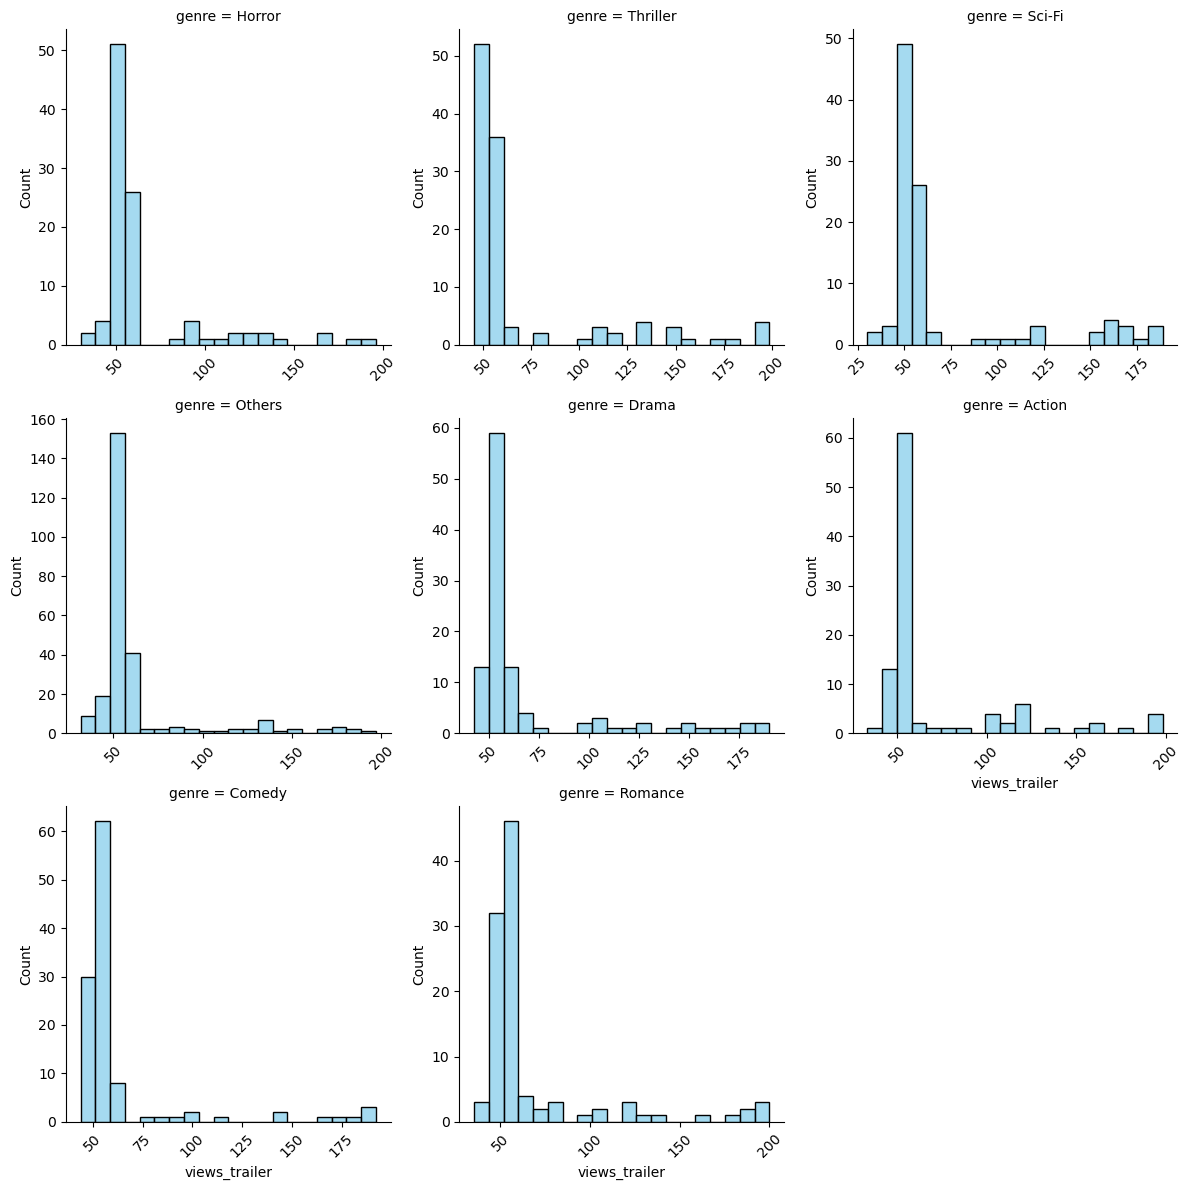

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Facet grid with better arrangement
m = sns.FacetGrid(data, col="genre", col_wrap=3, height=4, sharex=False, sharey=False)

# Map histplot with better binning
m.map(sns.histplot, "views_trailer", bins=20, kde=False, color="skyblue")

# Rotate x-ticks if needed
for ax in m.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

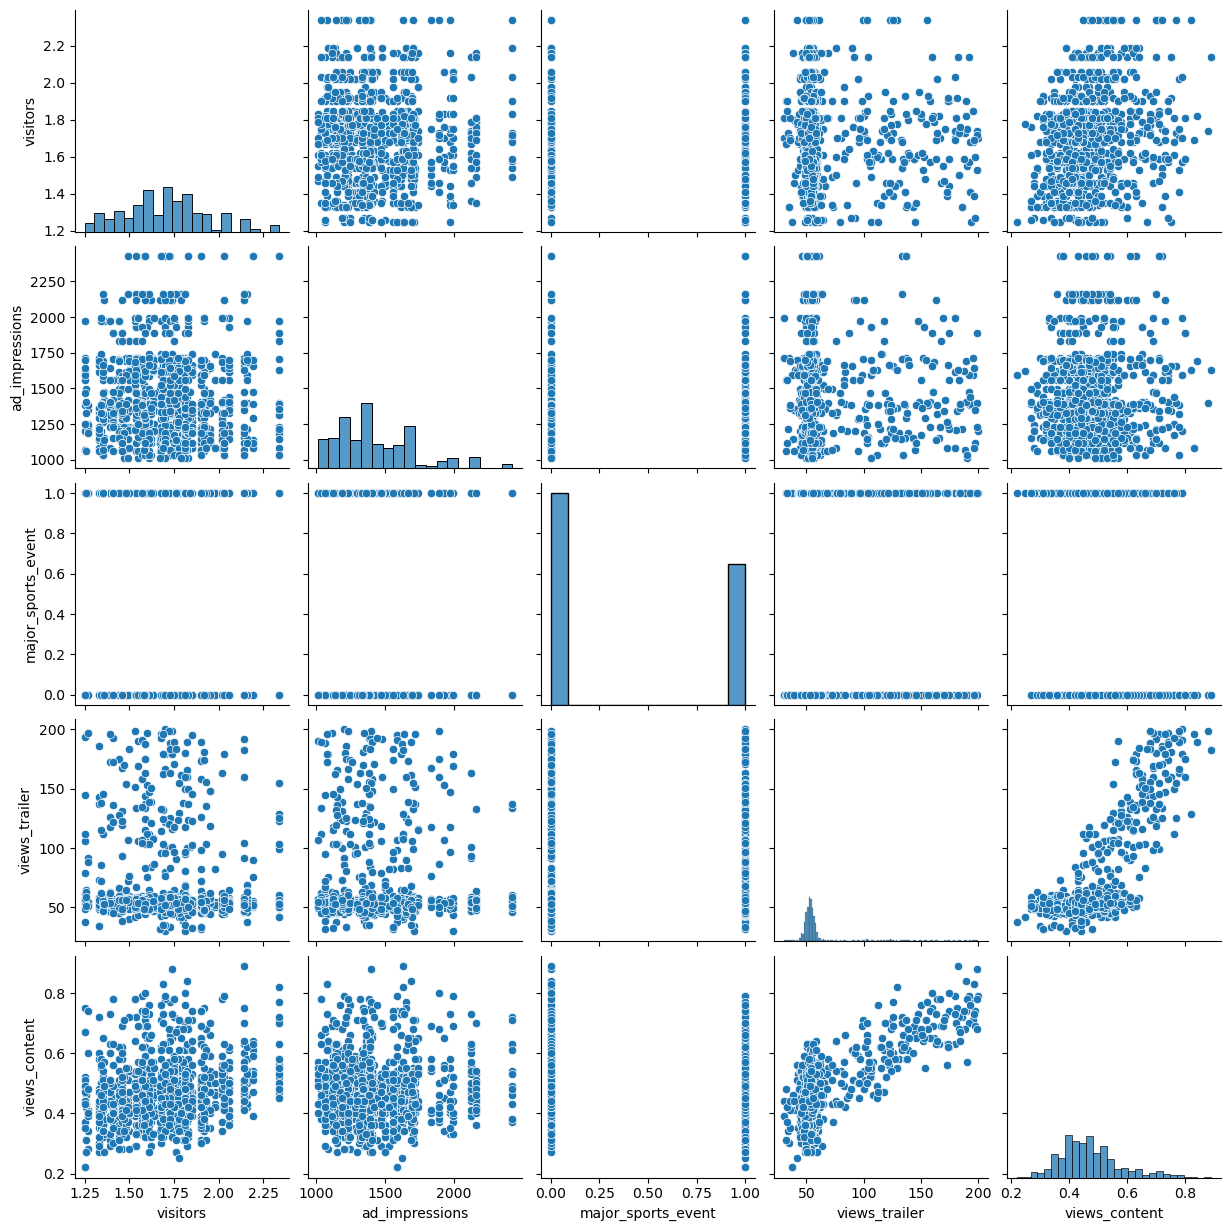

<Figure size 2000x1000 with 0 Axes>

In [21]:
sns.pairplot(data)
plt.figure(figsize=(20, 10))
plt.show()

1. What does the distribution of content views look like?

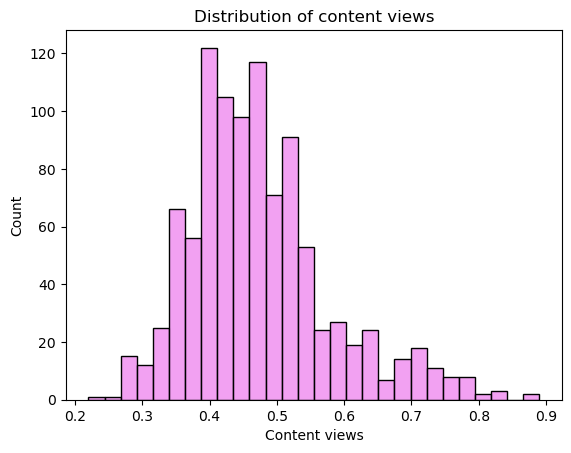

In [22]:
plt.title('Distribution of content views')
plt.xlabel('Content views')
sns.histplot(data=data, x='views_content', color='Violet')
plt.show()

2. What does the distribution of genres look like?

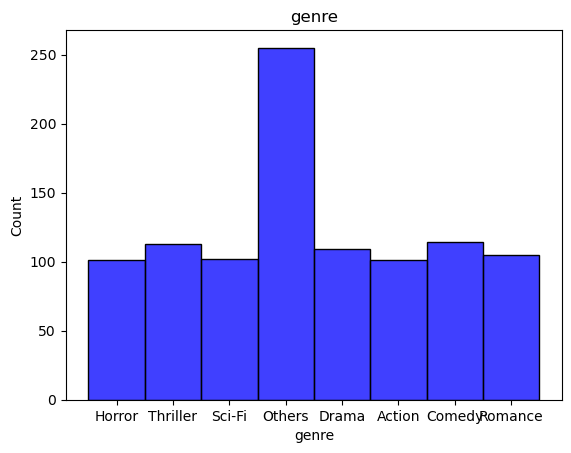

In [23]:
plt.title('genre')
plt.xlabel('genre')
sns.histplot(data=data, x='genre', color='Blue')
plt.show()

3.The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?

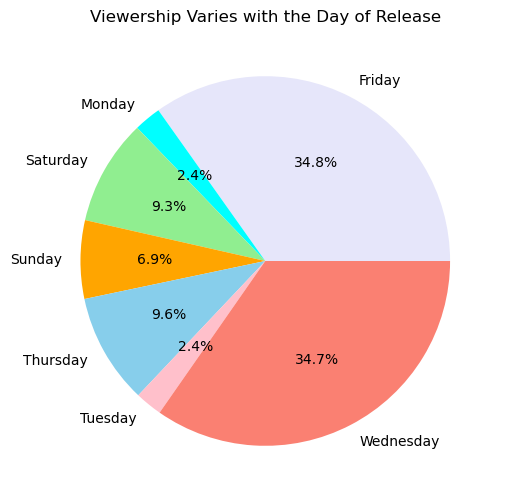

In [24]:
# Group data by 'dayofweek' and sum the 'views_content'
daywise_views = data.groupby('dayofweek')['views_content'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(daywise_views, labels=daywise_views.index, autopct='%1.1f%%', colors=['lavender', 'cyan', 'lightgreen', 'orange', 'skyblue', 'pink', 'salmon'])
plt.title("Viewership Varies with the Day of Release")
plt.show()

4. How does the viewership vary with the season of release?

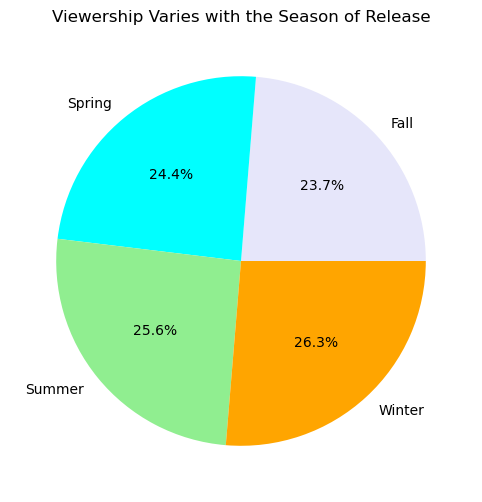

In [25]:
# Group data by 'season' and sum the 'views_content'
seasonal_views = data.groupby('season')['views_content'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(seasonal_views, labels=seasonal_views.index, autopct='%1.1f%%',
        colors=['lavender', 'cyan', 'lightgreen', 'orange'])  # Adjust color list as needed
plt.title("Viewership Varies with the Season of Release")
plt.show()

/var/folders/yx/czbnbc7d0cxcfk5rq7g_sq_h0000gn/T/ipykernel_7927/1256154504.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='season', y='views_content', palette='Set3')


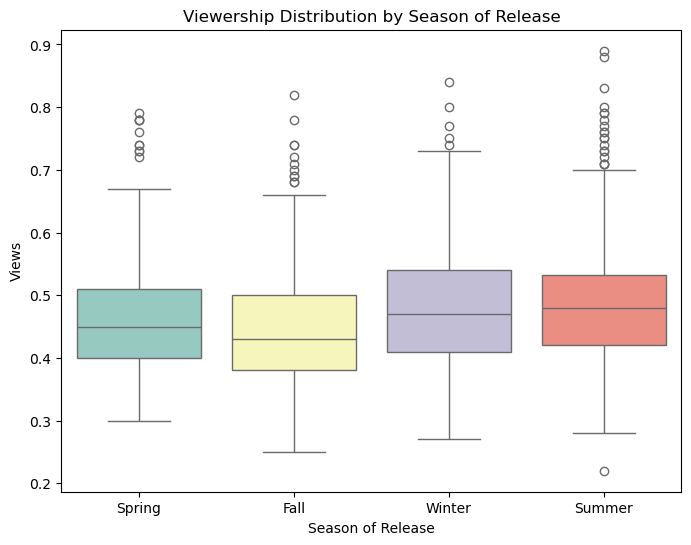

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='season', y='views_content', palette='Set3')
plt.title("Viewership Distribution by Season of Release")
plt.xlabel("Season of Release")
plt.ylabel("Views")
plt.show()

5. What is the correlation between trailer views and content views?

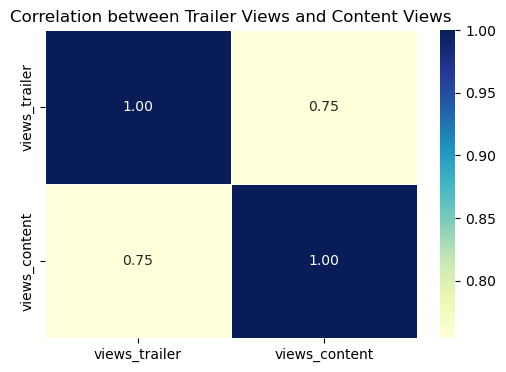

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the relevant columns
corr_data = data[['views_trailer', 'views_content']]

# Compute the correlation matrix
corr_matrix = corr_data.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Correlation between Trailer Views and Content Views")
plt.show()

In [28]:
# Outlier Detection

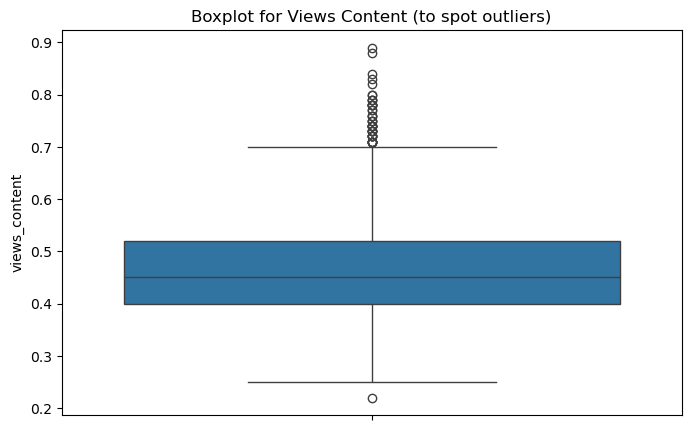

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=data, y='views_content')
plt.title('Boxplot for Views Content (to spot outliers)')
plt.show()

In [30]:
from scipy.stats import zscore

# <!-- Compute Z-scores for all numerical columns -->
z_scores = data.select_dtypes(include='number').apply(zscore)

# <!-- Set threshold for Z-score -->
threshold = 3
outliers_z = data[(z_scores > threshold) | (z_scores < -threshold)].dropna(how='all')
print(outliers_z)

     visitors  ad_impressions  major_sports_event genre dayofweek season  \
13        NaN             NaN                 NaN   NaN       NaN    NaN   
16        NaN             NaN                 NaN   NaN       NaN    NaN   
22        NaN             NaN                 NaN   NaN       NaN    NaN   
59        NaN             NaN                 NaN   NaN       NaN    NaN   
61        NaN             NaN                 NaN   NaN       NaN    NaN   
67        NaN             NaN                 NaN   NaN       NaN    NaN   
80        NaN             NaN                 NaN   NaN       NaN    NaN   
90        NaN             NaN                 NaN   NaN       NaN    NaN   
96        NaN             NaN                 NaN   NaN       NaN    NaN   
106       NaN          2424.2                 NaN   NaN       NaN    NaN   
124       NaN             NaN                 NaN   NaN       NaN    NaN   
128       NaN             NaN                 NaN   NaN       NaN    NaN   
141       Na

In [31]:
# Feature Engineering - One hot Encoding

In [32]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Recreate derived features
data['ad_per_visitor'] = data['ad_impressions'] / data['visitors']
data['trailer_to_content_ratio'] = data['views_trailer'] / (data['views_content'] + 1e-5)

# Step 2: One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['genre', 'dayofweek', 'season'], drop_first=True)

# Step 3: Drop derived feature to avoid multicollinearity
data_encoded = data_encoded.drop(['ad_per_visitor'], axis=1)
data_encoded = data_encoded.drop(columns=['trailer_to_content_ratio'])


print("Shape of encoded data frame",data_encoded.shape)
# print("Encoded data frame")
# print(data_encoded.head())

# Step 4: Add constant
X = add_constant(data_encoded)

# Step 5: Ensure numeric and clean data
X = X.apply(pd.to_numeric, errors='coerce')  # Coerce non-numeric to NaN
X = X.replace([np.inf, -np.inf], np.nan).dropna()  # Remove inf and NaNs
# Convert all boolean columns to float
X = X.astype({col: 'float64' for col in X.select_dtypes(include='bool').columns})


Shape of encoded data frame (1000, 21)


Data Preparation for Modeling
Converted categorical columns (genre, dayofweek, season) into one-hot encoded variables.

Final dataset has 21 features and 1,000 rows.

In [33]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame from previous feature engineering
data_encoded = data_encoded.astype({
    col: 'float64' for col in data_encoded.select_dtypes(include='bool').columns
})

# Ensure all numeric
data_encoded = data_encoded.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN or inf
data_encoded = data_encoded.replace([np.inf, -np.inf], np.nan).dropna()

print(data_encoded)
# Separate features and target
X = data_encoded.drop('views_content', axis=1)
y = data_encoded['views_content']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add constant for intercept in statsmodels
X_train_sm = sm.add_constant(X_train)

# Build the OLS regression model
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Show the summary of the model (R², F-statistic, p-values, etc.)
print(ols_model.summary())

# Get and print coefficients with feature names
model_coefficients = pd.DataFrame({
    'Feature': X_train_sm.columns,
    'Coefficient': ols_model.params,
    'P-Value': ols_model.pvalues,
    'Standard Error': ols_model.bse
})

print("\nModel Coefficients:")
print(model_coefficients)

     visitors  ad_impressions  major_sports_event  views_trailer  \
0        1.67         1113.81                   0          56.70   
1        1.46         1498.41                   1          52.69   
2        1.47         1079.19                   1          48.74   
3        1.85         1342.77                   1          49.81   
4        1.46         1498.41                   0          55.83   
..        ...             ...                 ...            ...   
995      1.58         1311.96                   0          48.58   
996      1.34         1329.48                   0          72.42   
997      1.62         1359.80                   1         150.44   
998      2.06         1698.35                   0          48.72   
999      1.36         1140.23                   0          52.94   

     views_content  genre_Comedy  genre_Drama  genre_Horror  genre_Others  \
0             0.51           0.0          0.0           1.0           0.0   
1             0.32           

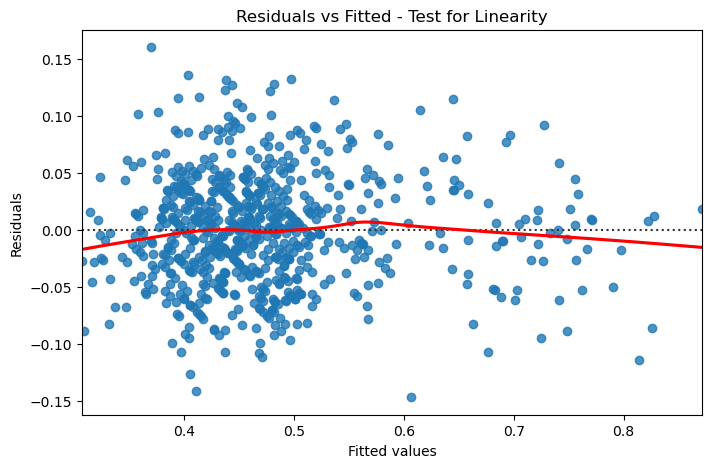

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted values and residuals
y_train_pred = ols_model.predict(X_train_sm)
residuals = y_train - y_train_pred

df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = y_train_pred # predicted values
df_pred["Residuals"] = residuals  # residuals

df_pred.head()

plt.figure(figsize=(8, 5))
sns.residplot(x=y_train_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted - Test for Linearity')
plt.show()

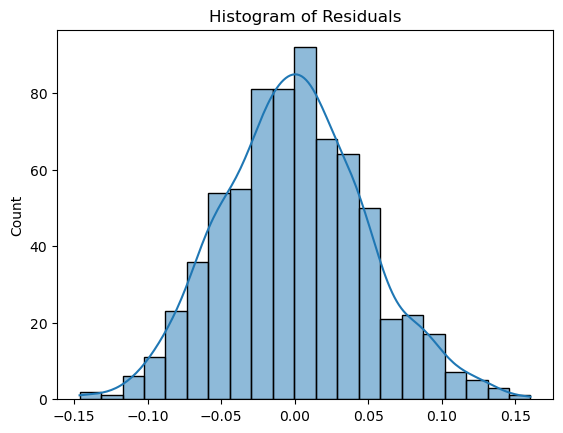

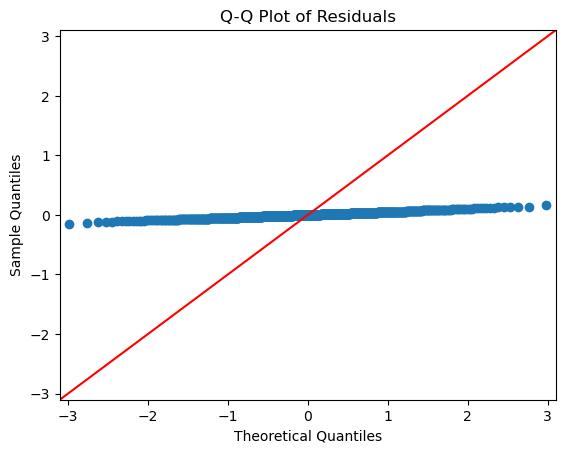

In [35]:
import scipy.stats as stats

# Histogram
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [36]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, X_train_sm)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 16.133653956276984, 'p-value': 0.7082987145069186, 'f-value': 0.8009423990292167, 'f p-value': 0.7140336059967818}


In [37]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Step 7: Output VIF table
print(vif_data.sort_values(by='VIF', ascending=False))

                Feature        VIF
0              visitors  24.995696
1        ad_impressions  19.989257
3         views_trailer   4.524635
7          genre_Others   3.189512
19        season_Winter   2.068752
18        season_Summer   2.005788
10       genre_Thriller   1.997782
5           genre_Drama   1.979222
4          genre_Comedy   1.972451
17        season_Spring   1.957790
9          genre_Sci-Fi   1.945411
8         genre_Romance   1.930391
16  dayofweek_Wednesday   1.896359
6          genre_Horror   1.891600
2    major_sports_event   1.712143
14   dayofweek_Thursday   1.262878
12   dayofweek_Saturday   1.246074
13     dayofweek_Sunday   1.197994
15    dayofweek_Tuesday   1.076619
11     dayofweek_Monday   1.074368


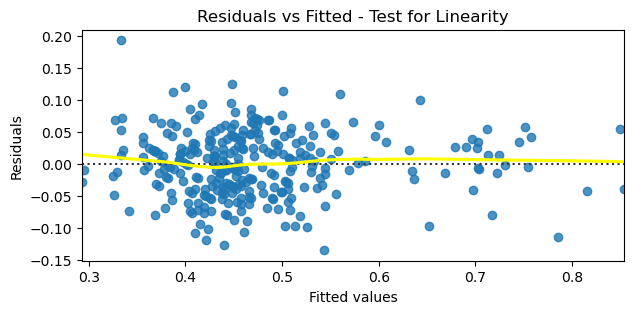

In [38]:
## Predict the values on test data
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted values and residuals

X_test_sm = sm.add_constant(X_test)
y_test_pred = ols_model.predict(X_test_sm)

residuals = y_test - y_test_pred

df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = y_train_pred # predicted values
df_pred["Residuals"] = residuals  # residuals

df_pred.head()

plt.figure(figsize=(7, 3))
sns.residplot(x=y_test_pred, y=residuals, lowess=True, line_kws={'color': 'yellow'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted - Test for Linearity')
plt.show()

Model Evaluation

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on train and test sets
X_test_sm = sm.add_constant(X_test)
y_train_pred = ols_model.predict(X_train_sm)
y_test_pred = ols_model.predict(X_test_sm)

# Define a function to print metrics
def evaluate_model(true, predicted, dataset_name):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)

    print(f"--- {dataset_name} ---")
    print(f"R² Score        : {r2:.4f}")
    print(f"MAE             : {mae:.4f}")
    print(f"MSE             : {mse:.4f}")
    print(f"RMSE            : {rmse:.4f}")
    print()

# Evaluate on Train and Test sets
evaluate_model(y_train, y_train_pred, "Train Set")
evaluate_model(y_test, y_test_pred, "Test Set")

--- Train Set ---
R² Score        : 0.7905
MAE             : 0.0384
MSE             : 0.0024
RMSE            : 0.0485

--- Test Set ---
R² Score        : 0.7638
MAE             : 0.0410
MSE             : 0.0026
RMSE            : 0.0513



Higher R² and Adjusted R² → better model

Lower MAE, MSE, RMSE → better accuracy

Large differences between train and test metrics → possible overfitting